# Import the necessary Libraries
* Pandas
* Matplotlib

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the simple_sales_dataset.csv

In [22]:
dataset_url = "simple_sales_dataset.csv"
sales_data_df = pd.read_csv(dataset_url)
sales_data_df

,Unnamed: 0,Date,Region,Product,Quantity Sold,Price per Unit
0,0,2025-01-01,North,A,100,10
1,1,2025-01-02,East,B,150,20
2,2,2025-01-03,West,C,200,15
3,3,2025-01-04,South,A,120,10
4,4,2025-01-05,North,B,130,20


# Initial Exploration

In [41]:
sales_data_df.info()

# Gets the details about the column, data types, total memory usage, and no-null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      5 non-null      int64 
 1   Date            5 non-null      object
 2   Region          5 non-null      object
 3   Product         5 non-null      object
 4   Quantity Sold   5 non-null      int64 
 5   Price per Unit  5 non-null      int64 
 6   Total Sale      5 non-null      int64 
dtypes: int64(4), object(3)
memory usage: 408.0+ bytes


In [42]:
sales_data_df.describe().T

# T for Transpose - Switch the columns with indexes and the oposite

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5.0,2.0,1.581139,0.0,1.0,2.0,3.0,4.0
Quantity Sold,5.0,140.0,38.078866,100.0,120.0,130.0,150.0,200.0
Price per Unit,5.0,15.0,5.000000,10.0,10.0,15.0,20.0,20.0
Total Sale,5.0,2160.0,983.869910,1000.0,1200.0,2600.0,3000.0,3000.0


# Calculates the total sales and add a new column to the DataFrame

In [23]:
sales_data_df["Total Sale"] = sales_data_df["Quantity Sold"] * sales_data_df["Price per Unit"]
sales_data_df

,Unnamed: 0,Date,Region,Product,Quantity Sold,Price per Unit,Total Sale
0,0,2025-01-01,North,A,100,10,1000
1,1,2025-01-02,East,B,150,20,3000
2,2,2025-01-03,West,C,200,15,3000
3,3,2025-01-04,South,A,120,10,1200
4,4,2025-01-05,North,B,130,20,2600


# Total Sales by Region
* Group and calculate total sales for each region

In [26]:
total_sales_region = sales_data_df.groupby("Region")["Total Sale"].sum()
total_sales_region

,Total Sale
Region,
East,3000
North,3600
South,1200
West,3000


# Total Sales by Product
* Group and calculate total sales for each product

In [27]:
total_sales_product = sales_data_df.groupby("Product")["Total Sale"].sum()
total_sales_product

,Total Sale
Product,
A,2200
B,5600
C,3000


# Find the Region with the Highest Sales
* Identify the region contributing the most sales.

In [28]:
highest_sales_region = total_sales_region.idxmax()
highest_sales_region

'North'

# Find the Most Sold Product
* Identify the product with the highest quantity sold.

In [29]:
most_sold_product = sales_data_df.groupby("Product")["Quantity Sold"].sum().idxmax()
most_sold_product

'B'

# Visualize Sales by Product
* Use a bar chart to show total sales by region

<Axes: title={'center': 'Total Sales by Region'}, xlabel='Region'>

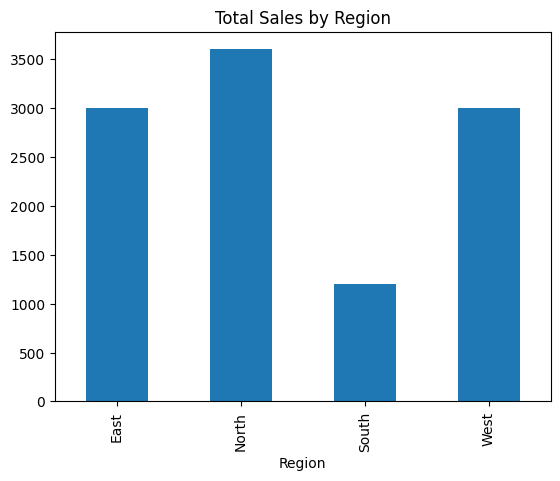

In [31]:
total_sales_region.plot(kind="bar", title="Total Sales by Region")

# Visualize Sales by Product
* Use a pie chart to represent the sales districution by product.

<Axes: title={'center': 'Total Sales by Product'}, ylabel='Total Sale'>

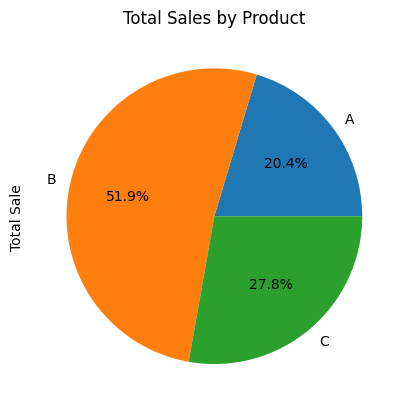

In [38]:
total_sales_product.plot(kind="pie", title="Total Sales by Product", autopct="%1.1f%%")

# Export Results
* Save the analysis result as CSV files.
* Total Sales by Regions = total_sales_by_region.csv
* Total Sales by Prodcut = total_sales_by_product.csv

In [39]:
total_sales_product.to_csv("total_sales_by_product.csv")
total_sales_region.to_csv("total_sales_by_region.csv")